In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("data sample_Volcano Plot.xlsx")  # Change .csv to .xlsx
df.head()

,Gene symbol,log2FoldChange,pvalue
0,a,5.490865,4.172750e-02
1,b,4.051469,1.060451e-04
2,c,3.738013,6.300925e-05
3,d,1.644740,5.167915e-05
4,e,0.640922,3.684648e-07


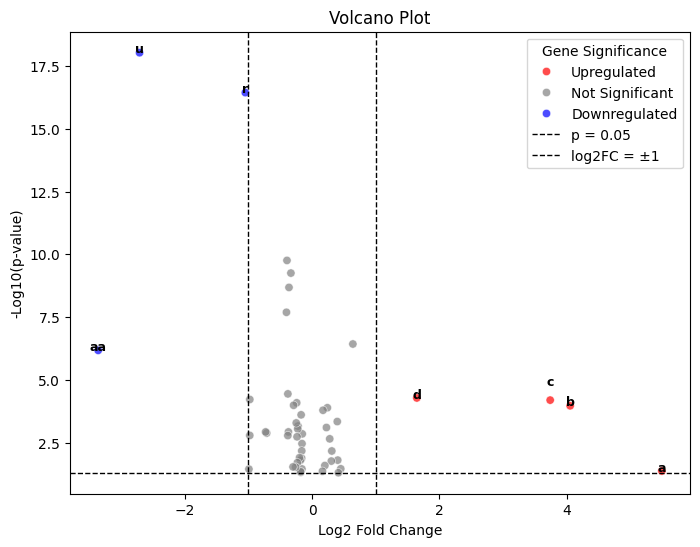

In [4]:
# Import required libraries
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For beautiful statistical plots

# Load the dataset (Make sure the file is in the same directory or provide full path)
df = pd.read_excel("data sample_Volcano Plot.xlsx", engine="openpyxl")  # Ensure correct file name

# Convert p-values to -log10(p-values) for better visualization
df['-log10(p-value)'] = -np.log10(df['pvalue'])  # Higher values indicate more significance

# Define biological and statistical significance thresholds
pval_threshold = 0.05  # Typical p-value cutoff for statistical significance
log2fc_threshold = 1  # Fold change cutoff (genes with abs(log2FC) > 1 are considered significant)

# Categorize genes based on their significance and fold change
df['Significance'] = 'Not Significant'  # Default category (grey dots)
df.loc[(df['log2FoldChange'] >= log2fc_threshold) & (df['pvalue'] < pval_threshold), 'Significance'] = 'Upregulated'
df.loc[(df['log2FoldChange'] <= -log2fc_threshold) & (df['pvalue'] < pval_threshold), 'Significance'] = 'Downregulated'

# Initialize the plot
plt.figure(figsize=(8, 6))  # Set figure size

# Create a scatterplot for volcano plot
sns.scatterplot(
    data=df, x='log2FoldChange', y='-log10(p-value)', hue='Significance',
    palette={'Upregulated': 'red', 'Downregulated': 'blue', 'Not Significant': 'grey'}, alpha=0.7
)

# Add a horizontal line for p-value threshold (p = 0.05)
plt.axhline(y=-np.log10(pval_threshold), color='black', linestyle='--', linewidth=1, label='p = 0.05')

# Add vertical lines for fold change thresholds (log2FC = ±1)
plt.axvline(x=log2fc_threshold, color='black', linestyle='--', linewidth=1, label='log2FC = ±1')
plt.axvline(x=-log2fc_threshold, color='black', linestyle='--', linewidth=1)

### Function to dynamically adjust label positions to prevent overlap ###
def spread_labels(selected_df, y_offset=0.2, max_offset=0.5):
    """
    Adjusts the position of gene labels dynamically to prevent overlap.

    Parameters:
    selected_df (DataFrame): Subset of genes to be labeled.
    y_offset (float): Small initial shift to prevent overlap.
    max_offset (float): Maximum allowed shift to keep labels close to dots.
    """
    used_positions = set()  # Store positions to avoid overlapping labels

    for i, row in selected_df.iterrows():
        new_y = row['-log10(p-value)']  # Default label position at dot
        offset_step = y_offset  # Start with small offset

        # If there's another label too close, shift it slightly upwards
        while any(abs(new_y - y) < 0.3 for y in used_positions) and offset_step <= max_offset:
            new_y += offset_step  # Increase label position gradually
            offset_step += y_offset  # Increase spacing step

        used_positions.add(new_y)  # Store the new position
        plt.text(row['log2FoldChange'], new_y, row['Gene symbol'], 
                 fontsize=9, ha='center', color='black', fontweight='bold')

# Select and label the top 5 most significant upregulated genes
top_upregulated = df[df['Significance'] == 'Upregulated'].nsmallest(15, 'pvalue')
spread_labels(top_upregulated, y_offset=0.2, max_offset=0.5)

# Select and label the top 5 most significant downregulated genes
top_downregulated = df[df['Significance'] == 'Downregulated'].nsmallest(15, 'pvalue')
spread_labels(top_downregulated, y_offset=0.2, max_offset=0.5)

# Set plot labels and title
plt.xlabel("Log2 Fold Change")  # X-axis label
plt.ylabel("-Log10(p-value)")  # Y-axis label
plt.title("Volcano Plot")  # Title of the plot
plt.legend(title="Gene Significance")  # Add a legend for categories


# Display the plot
plt.show()